# Model Training

## 1. Import Required Packages

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

## 2. Import Data

### 2.1 Imbalanced Datasets

In [4]:
X_train = np.load("data/Original/X_train.npy")
y_train = np.load("data/Original/y_train.npy")
X_val = np.load("data/Original/X_val.npy")
y_val = np.load("data/Original/y_val.npy")

In [5]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208480, 66), (208480,), (52121, 66), (52121,))

### 2.2 Undersampled Datasets

In [6]:
X_train_under_sample = np.load("data/UnderSampling/X_train_undersample.npy")
y_train_under_sample = np.load("data/UnderSampling/y_train_undersample.npy")

### 2.3 Oversampled Datasets

In [7]:
X_train_over_sample = np.load("data/OverSampling/X_train_oversample.npy")
y_train_over_sample = np.load("data/OverSampling/y_train_oversample.npy")

### 2.4 SMOTE Datasets

In [8]:
X_train_smote = np.load("data/SMOTE/X_train_smote.npy")
y_train_smote = np.load("data/SMOTE/y_train_smote.npy")

### Create an Evaluation function to give all metrics after model Training

#### GLOBAL VARIABLES

In [9]:
RANDOM_SEED = 42
MODELS = {
    "Multinomial Logistic Regression": LogisticRegression(multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
}

In [9]:
def plot_confusion_matrix(true, predicted, test=False):
    """
    Generate the confusion matrix and classification report
    """
    if test:
        cm = confusion_matrix(true, predicted)
        cr = classification_report(true, predicted)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
        # confusion matrix in heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

## Model Training

In [10]:
def evaluate_model(true, predicted, test=False):
    """
    Generate the confusion matrix and classification report
    """
    if test:
        cm = confusion_matrix(true, predicted)
        cr = classification_report(true, predicted)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
        # confusion matrix in heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

In [12]:
def train_and_evaluate(X_train, y_train):    
    model_list = []
    f1_micro_train = []
    f1_micro_val = []
    time_taken = []
    
    for i in range(len(MODELS)):
        
        model = list(MODELS.values())[i]
        
        # start time
        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        # end time
        end_time = time.time()

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Evaluate Train and Validation dataset
        model_train_f1 = evaluate_model(y_train, y_train_pred)
        model_val_f1 = evaluate_model(y_val, y_val_pred, test=True)

        print(list(MODELS.keys())[i])
        model_list.append(list(MODELS.keys())[i])

        print("Model Performance for Training Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
        print("--------------------------------------")

        print("Model Performance for Validation Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_val_f1))
        
        f1_micro_train.append(model_train_f1)
        f1_micro_val.append(model_val_f1)
        time_ellapsed = np.round(end_time - start_time, 2)
        time_taken.append(time_ellapsed)
        
        print('='*35)
        print('\n')
    results = pd.DataFrame(list(zip(model_list, f1_micro_train, f1_micro_val, time_taken)), 
                           columns=['Model Name', 'Train Micro Averaged F1-Score', 'Val Micro Averaged F1-Score', 'Time']).sort_values(by=["Val Micro Averaged F1-Score"],ascending=False)
    return results

### 1. For Imbalanced Datasets

#### Train the models

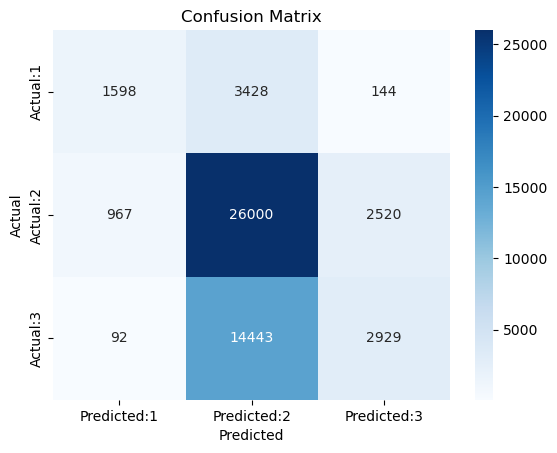

              precision    recall  f1-score   support

           1       0.60      0.31      0.41      5170
           2       0.59      0.88      0.71     29487
           3       0.52      0.17      0.25     17464

    accuracy                           0.59     52121
   macro avg       0.57      0.45      0.46     52121
weighted avg       0.57      0.59      0.53     52121

Multinomial Logistic Regression
Model Performance for Training Set
F1 Micro-Averaged Score: 0.5899
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5857




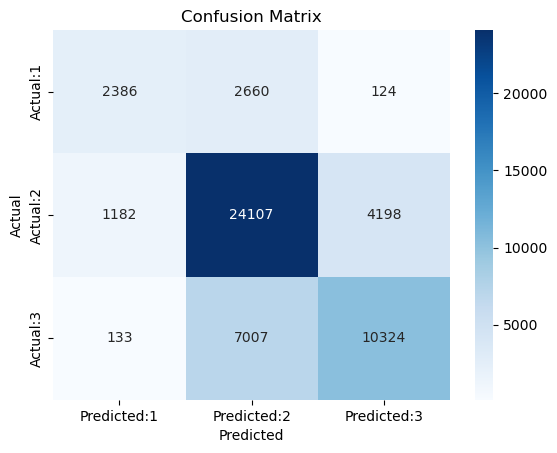

              precision    recall  f1-score   support

           1       0.64      0.46      0.54      5170
           2       0.71      0.82      0.76     29487
           3       0.70      0.59      0.64     17464

    accuracy                           0.71     52121
   macro avg       0.69      0.62      0.65     52121
weighted avg       0.70      0.71      0.70     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9797
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7064




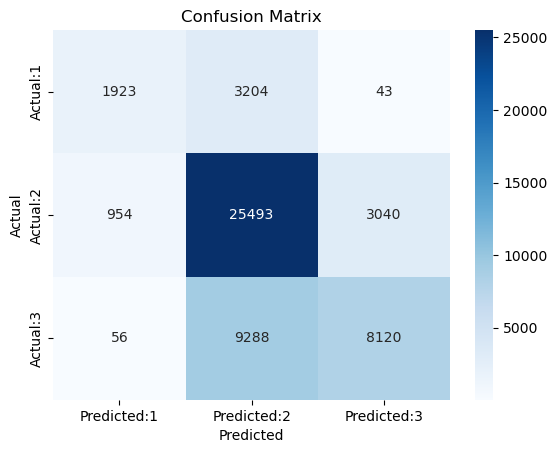

              precision    recall  f1-score   support

           1       0.66      0.37      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.72      0.46      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6833
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6818




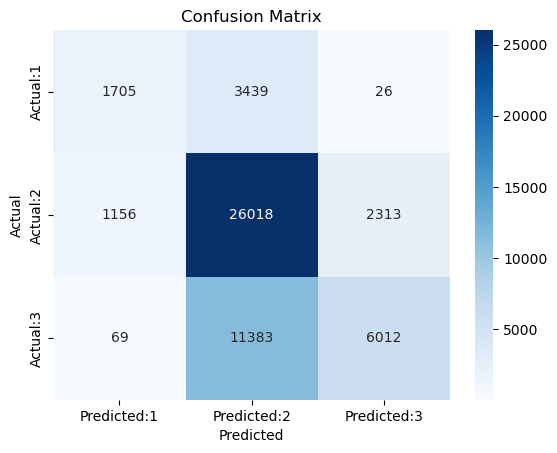

              precision    recall  f1-score   support

           1       0.58      0.33      0.42      5170
           2       0.64      0.88      0.74     29487
           3       0.72      0.34      0.47     17464

    accuracy                           0.65     52121
   macro avg       0.65      0.52      0.54     52121
weighted avg       0.66      0.65      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6490
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6472




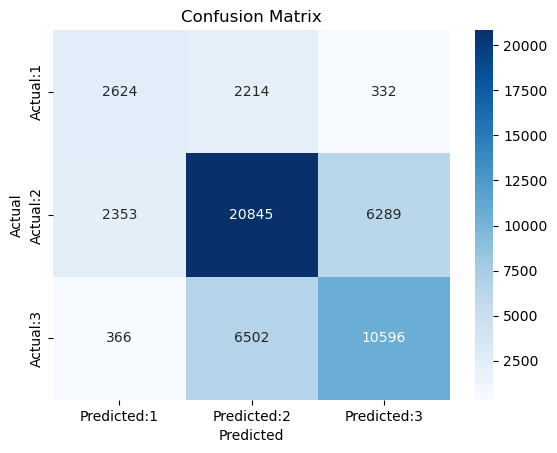

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.61      0.61     17464

    accuracy                           0.65     52121
   macro avg       0.60      0.61      0.61     52121
weighted avg       0.65      0.65      0.65     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9797
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6536




In [14]:
results_imbalanced_datasets = train_and_evaluate(X_train, y_train)

#### Results

In [15]:
results_imbalanced_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.979667,0.706376,85.51
2,Gradient Boosting Classifier,0.683313,0.681798,581.19
4,DecisionTree Classifier,0.979677,0.653575,6.52
3,AdaBoost Classifier,0.648964,0.647244,35.87
0,Multinomial Logistic Regression,0.589860,0.585695,7.58


### 2. For undersampled Datasets

#### Train the models

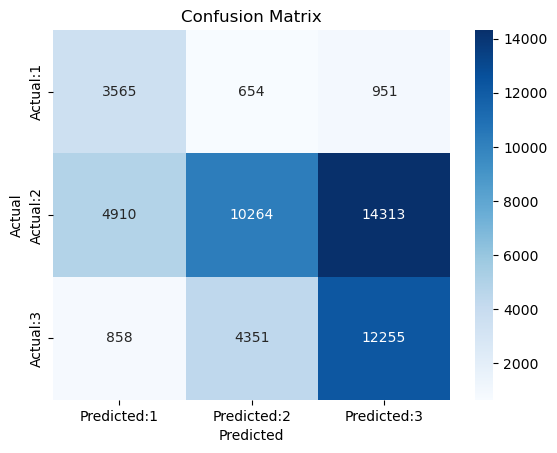

              precision    recall  f1-score   support

           1       0.38      0.69      0.49      5170
           2       0.67      0.35      0.46     29487
           3       0.45      0.70      0.54     17464

    accuracy                           0.50     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.50      0.49     52121

Multinomial Logistic Regression
Model Performance for Training Set
F1 Micro-Averaged Score: 0.5807
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5005




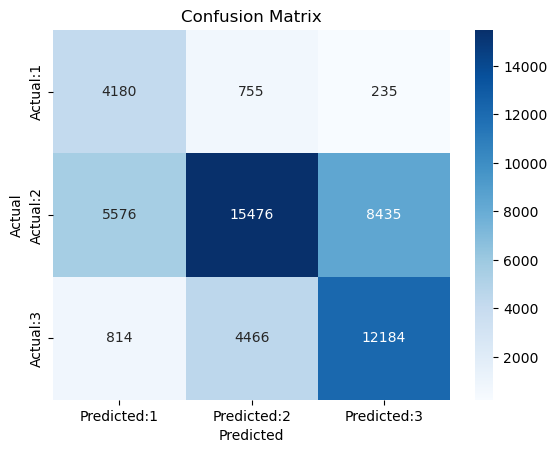

              precision    recall  f1-score   support

           1       0.40      0.81      0.53      5170
           2       0.75      0.52      0.62     29487
           3       0.58      0.70      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.58      0.68      0.59     52121
weighted avg       0.66      0.61      0.61     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9928
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6109




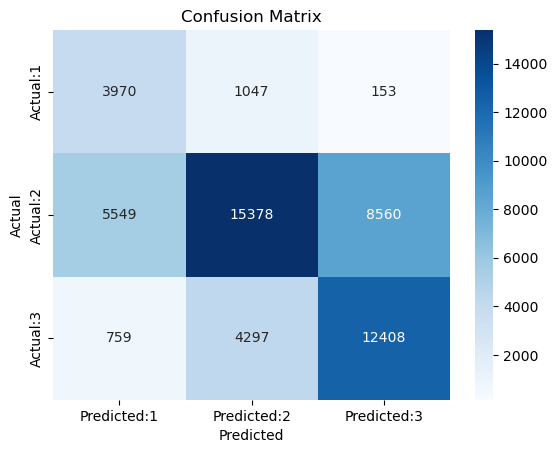

              precision    recall  f1-score   support

           1       0.39      0.77      0.51      5170
           2       0.74      0.52      0.61     29487
           3       0.59      0.71      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.57      0.67      0.59     52121
weighted avg       0.65      0.61      0.61     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6739
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6093




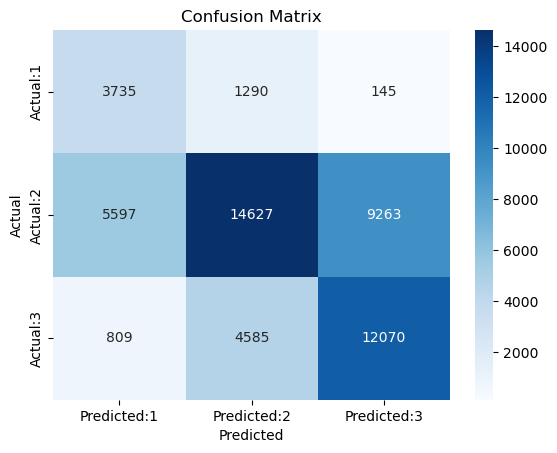

              precision    recall  f1-score   support

           1       0.37      0.72      0.49      5170
           2       0.71      0.50      0.59     29487
           3       0.56      0.69      0.62     17464

    accuracy                           0.58     52121
   macro avg       0.55      0.64      0.56     52121
weighted avg       0.63      0.58      0.59     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6363
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5839




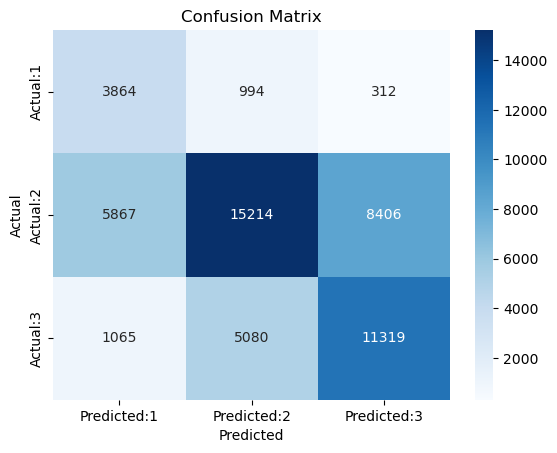

              precision    recall  f1-score   support

           1       0.36      0.75      0.48      5170
           2       0.71      0.52      0.60     29487
           3       0.56      0.65      0.60     17464

    accuracy                           0.58     52121
   macro avg       0.55      0.64      0.56     52121
weighted avg       0.63      0.58      0.59     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9928
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5832




In [16]:
results_undersample_datasets = train_and_evaluate(X_train_under_sample, y_train_under_sample)

#### Results

In [17]:
results_undersample_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.992817,0.610886,16.27
2,Gradient Boosting Classifier,0.673933,0.609275,120.83
3,AdaBoost Classifier,0.636314,0.583872,11.05
4,DecisionTree Classifier,0.992817,0.583201,1.67
0,Multinomial Logistic Regression,0.580736,0.500451,1.81


### 3. For oversampled Datasets

#### Train the models

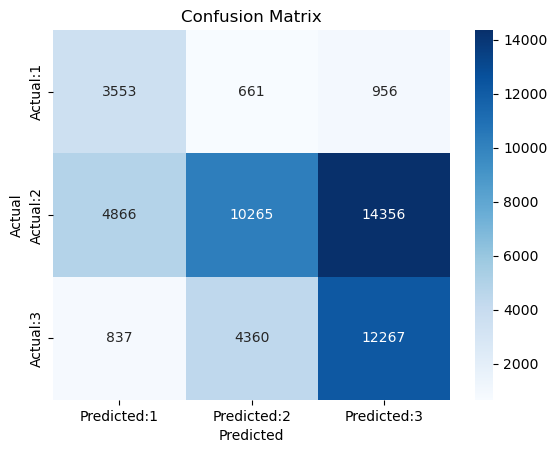

              precision    recall  f1-score   support

           1       0.38      0.69      0.49      5170
           2       0.67      0.35      0.46     29487
           3       0.44      0.70      0.54     17464

    accuracy                           0.50     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.50      0.49     52121

Multinomial Logistic Regression
Model Performance for Training Set
F1 Micro-Averaged Score: 0.5808
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5005




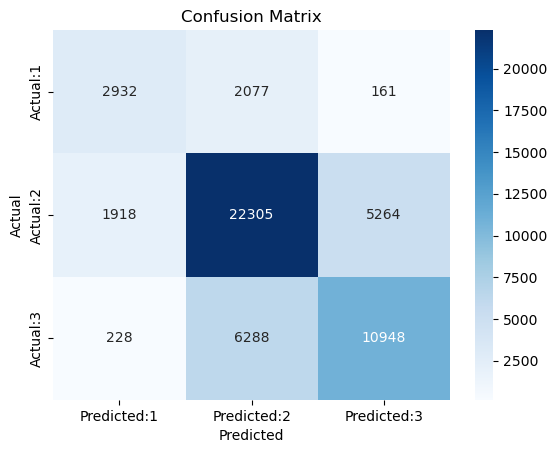

              precision    recall  f1-score   support

           1       0.58      0.57      0.57      5170
           2       0.73      0.76      0.74     29487
           3       0.67      0.63      0.65     17464

    accuracy                           0.69     52121
   macro avg       0.66      0.65      0.65     52121
weighted avg       0.69      0.69      0.69     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9865
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6942




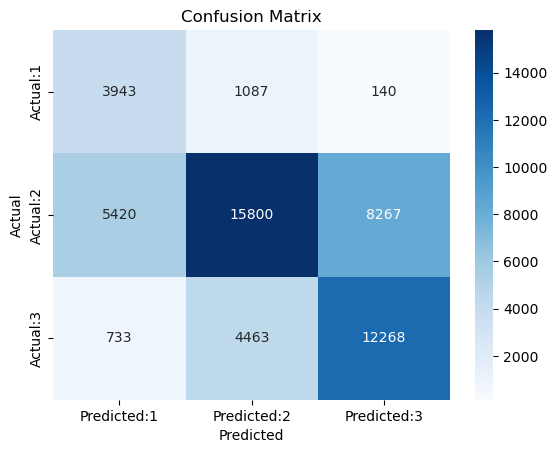

              precision    recall  f1-score   support

           1       0.39      0.76      0.52      5170
           2       0.74      0.54      0.62     29487
           3       0.59      0.70      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.57      0.67      0.59     52121
weighted avg       0.66      0.61      0.62     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6685
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6142




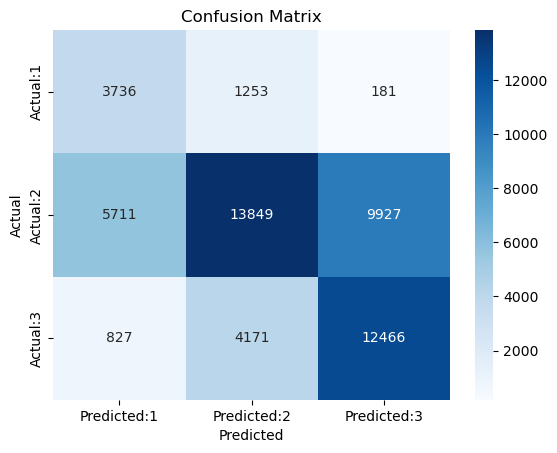

              precision    recall  f1-score   support

           1       0.36      0.72      0.48      5170
           2       0.72      0.47      0.57     29487
           3       0.55      0.71      0.62     17464

    accuracy                           0.58     52121
   macro avg       0.54      0.64      0.56     52121
weighted avg       0.63      0.58      0.58     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6361
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5766




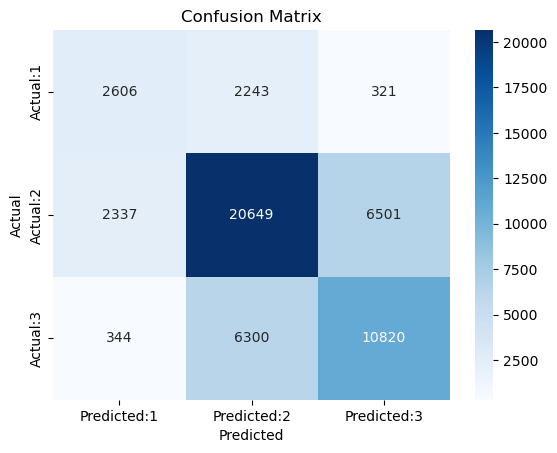

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.70      0.70     29487
           3       0.61      0.62      0.62     17464

    accuracy                           0.65     52121
   macro avg       0.60      0.61      0.61     52121
weighted avg       0.65      0.65      0.65     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9865
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6538




In [18]:
results_oversample_datasets = train_and_evaluate(X_train_over_sample, y_train_over_sample)

#### Results

In [19]:
results_oversample_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.986464,0.694250,175.35
4,DecisionTree Classifier,0.986470,0.653767,6.92
2,Gradient Boosting Classifier,0.668505,0.614167,1133.92
3,AdaBoost Classifier,0.636073,0.576562,43.50
0,Multinomial Logistic Regression,0.580768,0.500470,11.91


### 4. For SMOTE 

#### Train the models

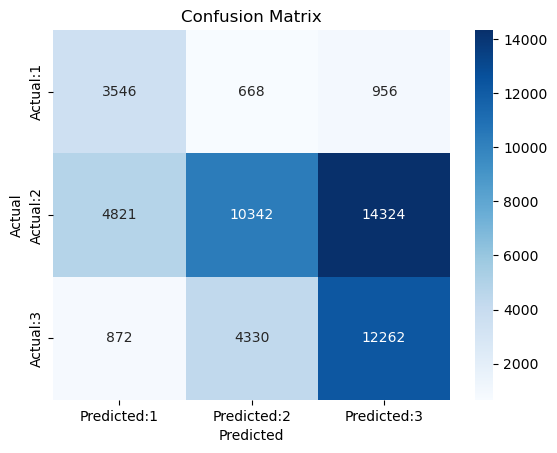

              precision    recall  f1-score   support

           1       0.38      0.69      0.49      5170
           2       0.67      0.35      0.46     29487
           3       0.45      0.70      0.54     17464

    accuracy                           0.50     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.50      0.49     52121

Multinomial Logistic Regression
Model Performance for Training Set
F1 Micro-Averaged Score: 0.5829
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5017




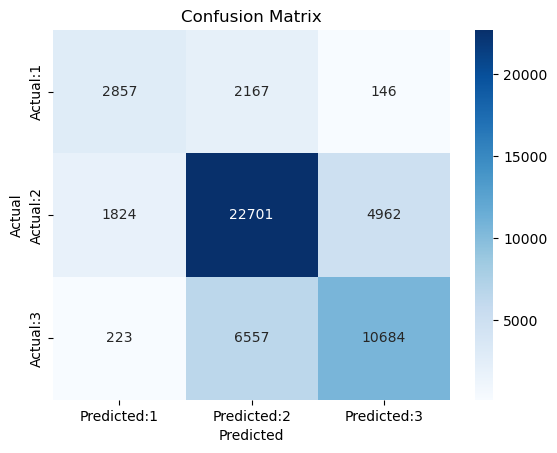

              precision    recall  f1-score   support

           1       0.58      0.55      0.57      5170
           2       0.72      0.77      0.75     29487
           3       0.68      0.61      0.64     17464

    accuracy                           0.70     52121
   macro avg       0.66      0.64      0.65     52121
weighted avg       0.69      0.70      0.69     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9880
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6953




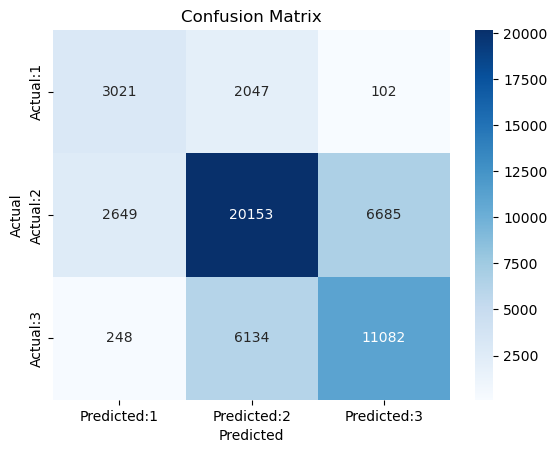

              precision    recall  f1-score   support

           1       0.51      0.58      0.54      5170
           2       0.71      0.68      0.70     29487
           3       0.62      0.63      0.63     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.63      0.62     52121
weighted avg       0.66      0.66      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7328
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6572




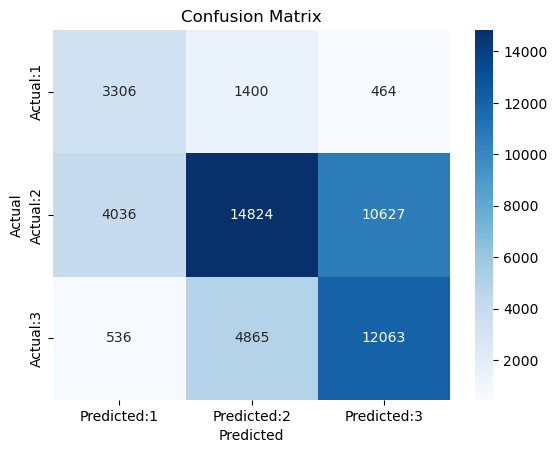

              precision    recall  f1-score   support

           1       0.42      0.64      0.51      5170
           2       0.70      0.50      0.59     29487
           3       0.52      0.69      0.59     17464

    accuracy                           0.58     52121
   macro avg       0.55      0.61      0.56     52121
weighted avg       0.61      0.58      0.58     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6534
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5793




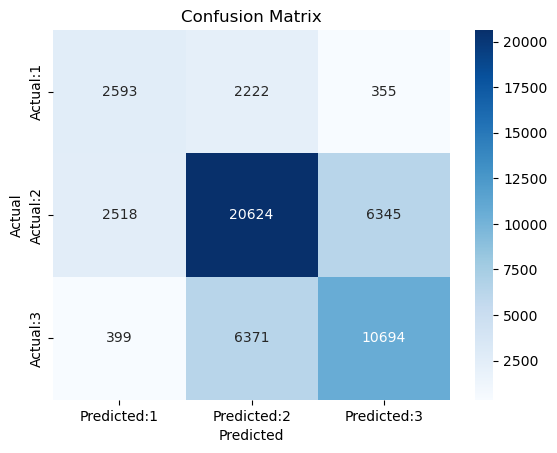

              precision    recall  f1-score   support

           1       0.47      0.50      0.49      5170
           2       0.71      0.70      0.70     29487
           3       0.61      0.61      0.61     17464

    accuracy                           0.65     52121
   macro avg       0.60      0.60      0.60     52121
weighted avg       0.65      0.65      0.65     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9880
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6506




In [20]:
results_smote = train_and_evaluate(X_train_smote, y_train_smote)

#### Results

In [21]:
results_smote

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.988030,0.695344,108.41
2,Gradient Boosting Classifier,0.732810,0.657240,617.07
4,DecisionTree Classifier,0.988030,0.650621,8.38
3,AdaBoost Classifier,0.653442,0.579287,46.61
0,Multinomial Logistic Regression,0.582946,0.501717,6.05


## Conclusion:
> We can see that the algorithms performed well on SMOTE datasets. So,we will now perform hyperparameter tuning on those datasets for different algorithms

# Hyperparameter Tuning

In [ ]:
#pip install mlflow

In [ ]:
#pip install pyngrok

In [10]:
RANDOM_SEED = 42

In [11]:
import mlflow
from sklearn.model_selection import GridSearchCV
import subprocess
from pyngrok import ngrok

In [12]:
experiment_name = "HouseDamageExperiment"

experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    experiment = mlflow.create_experiment(experiment_name)    
    experiment_id = experiment.experiment_id
else:
    experiment_id = experiment.experiment_id


In [13]:
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///F:/fuseProjects/damage_prediction/notebook/mlruns/579290660520967070', creation_time=1682938268055, experiment_id='579290660520967070', last_update_time=1682938268055, lifecycle_stage='active', name='HouseDamageExperiment', tags={}>

## Helper Functions

In [14]:
def run_mlflow_ui():
    proc = subprocess.Popen(["mlflow", "ui"])
    public_url = ngrok.connect(addr = "5000")
    print("MlFlow UI can be accessed at :", public_url)

In [15]:
def plot_confusion_matrix(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

In [16]:
def evaluate_model(model):
    
    print("Evaluating Model")
    
    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_val_pred = model.predict(X_val)
    
    # Calculate micro averaged f1-score
    f1_micro_train = f1_score(y_train_smote, y_train_pred, average='micro')
    f1_micro_val = f1_score(y_val, y_val_pred, average='micro')
    
    print("Finished Evaluating Model")
    
    return f1_micro_train, f1_micro_val, y_train_pred, y_val_pred

In [17]:
def grid_search_cv(estimator, param_grid):
    
    print("Performing GridSearchCv")
    
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid)
    grid_search.fit(X_train_smote, y_train_smote)
    best_params = grid_search.best_params_
    print("Finished GridSearchCv")
    return best_params

In [18]:
def train_model(estimator, best_params, estimator_name):
    
    print("Training Model")
    
    best_estimator = estimator.set_params(**best_params)
    
    best_estimator.fit(X_train_smote, y_train_smote)
    
    f1_micro_train, f1_micro_val, _ , y_val_pred = evaluate_model(best_estimator)
    
    log_results(best_params, best_estimator, estimator_name, f1_micro_train, f1_micro_val)
    
    print("Successfull")
    
    return y_val_pred

In [19]:
def log_results(best_params, estimator, estimator_name, f1_micro_train, f1_micro_val):
    
    print("Logging Results")
    
    with mlflow.start_run():
        
        mlflow.sklearn.log_model(estimator, estimator_name)
        
        mlflow.log_metric("f1_micro_train", f1_micro_train)
        mlflow.log_metric("f1_micro_val", f1_micro_val)
        
        # Set best params
        for param_name, param_value in best_params.items():
            mlflow.log_param(param_name, param_value) 
    print("Finished Logging Results")

In [20]:
feature_names = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age',
       'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'foundation_type_h', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_q',
       'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_m',
       'ground_floor_type_v', 'ground_floor_type_x', 'ground_floor_type_z',
       'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x', 'position_j', 'position_o', 'position_s',
       'position_t', 'plan_configuration_a', 'plan_configuration_c',
       'plan_configuration_d', 'plan_configuration_f', 'plan_configuration_m',
       'plan_configuration_n', 'plan_configuration_o', 'plan_configuration_q',
       'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w']

## 0. Multinomial Logistic Regression

In [21]:
# Instantiating the model
estimator = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Setting parameter grid
softmax_params = {
    'C':  [0.001, 0.01, 0.1,1],
    'penalty': ['l2']
}

Performing GridSearchCv


C:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished GridSearchCv
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results


C:\Users\DELL\miniconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Finished Logging Results
Successfull


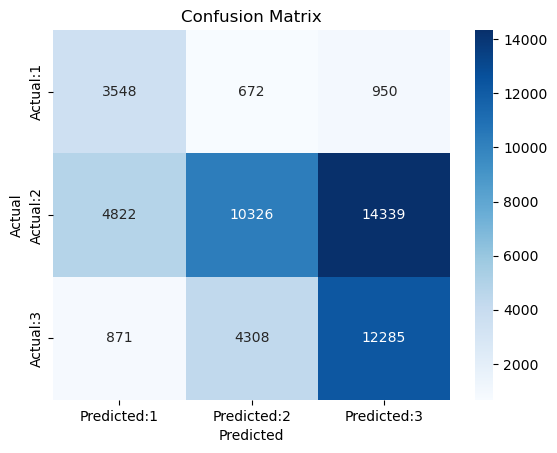

              precision    recall  f1-score   support

           1       0.38      0.69      0.49      5170
           2       0.67      0.35      0.46     29487
           3       0.45      0.70      0.55     17464

    accuracy                           0.50     52121
   macro avg       0.50      0.58      0.50     52121
weighted avg       0.57      0.50      0.49     52121

F1 Micro Averaged Score = 0.5018898332725773


In [22]:
estimator_name = "softmax_regressor"

best_params = grid_search_cv(estimator, softmax_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

### Feature Importance

In [24]:
softmax_model = LogisticRegression().set_params(**best_params)
softmax_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.01)

In [25]:
with open("../web/models/softmax_model.pickle", "wb") as f:
    pickle.dump(softmax_model, f)

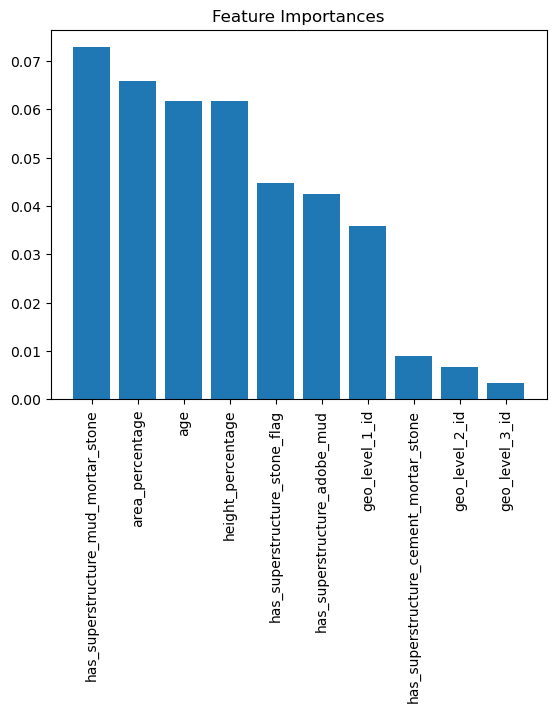

In [38]:
# Get the feature importances
importances = np.abs(softmax_model.coef_).sum(axis=0)
importances /= np.sum(importances)

# Top 10 importances
importances = importances[:10]

indices = np.argsort(importances)[::-1]


important_feature = []
for i in indices:
    important_feature.append(feature_names[i])
    
plt.title("Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), important_feature, rotation=90)
plt.show()

## Conclusion:

Give conclusion

In [ ]:
run_mlflow_ui()

## 1. Decision Tree Classifier

In [26]:
decision_tree_params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10]
}

Performing GridSearchCv
Finished GridSearchCv
Training Model
Evaluating Model
Finished Evaluating Model
Logging Results
Finished Logging Results
Successfull


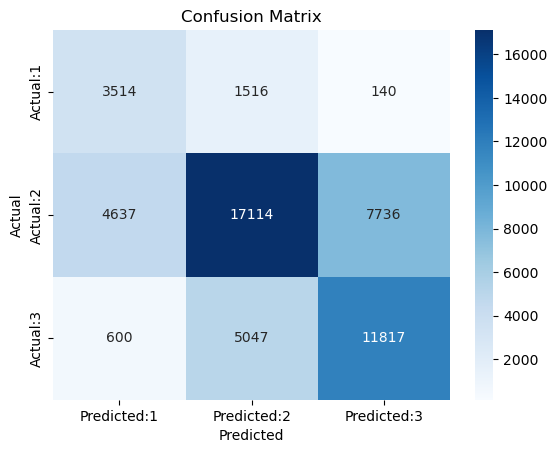

              precision    recall  f1-score   support

           1       0.40      0.68      0.50      5170
           2       0.72      0.58      0.64     29487
           3       0.60      0.68      0.64     17464

    accuracy                           0.62     52121
   macro avg       0.57      0.65      0.59     52121
weighted avg       0.65      0.62      0.63     52121

F1 Micro Averaged Score = 0.6224938124748182


In [27]:
estimator = DecisionTreeClassifier()

estimator_name = "decision_tree"

best_params = grid_search_cv(estimator, decision_tree_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

## Feature Importance

In [46]:
decision_tree_model = DecisionTreeClassifier().set_params(**best_params)
decision_tree_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_split=6)

In [29]:
with open("../web/models/decision_tree_model.pickle", "wb") as f:
    pickle.dump(decision_tree_model, f)

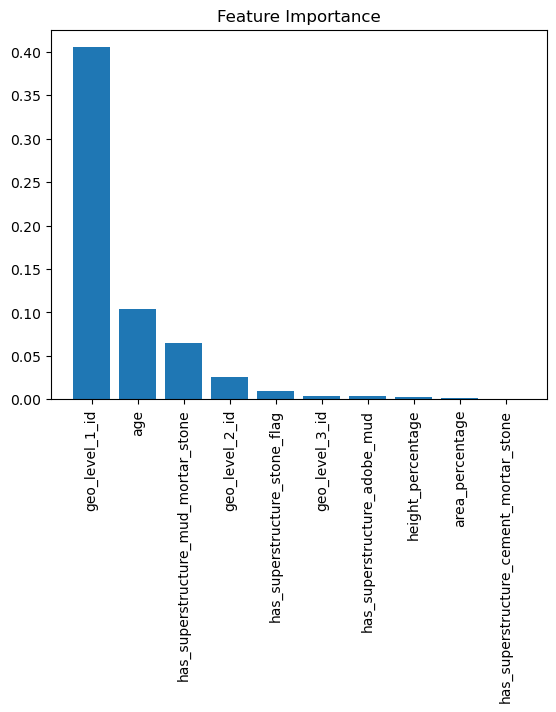

In [42]:
# Get the feature importances
importance = decision_tree_model.feature_importances_

importance = importance[:10]

sorted_idx = importance.argsort()[::-1]

important_feature = []
for i in sorted_idx:
    important_feature.append(feature_names[i])

# Create a bar plot of the feature importances
plt.bar(range(10), importance[sorted_idx])
plt.xticks(range(10), important_feature , rotation=90)
plt.title("Feature Importance")
plt.show()

## Conclusion:

Give conclusion

## 2. Random Forest

In [30]:
param_grid_random_forest = {
    'max_depth': [8,10],
    'max_features': ['sqrt'],
    'random_state': RANDOM_SEED
}

In [31]:
estimator = RandomForestClassifier()

estimator_name = "random_forest"

best_params = grid_search_cv(estimator, decision_tree_params)

y_val_pred = train_model(estimator, best_params, estimator_name)

f1_micro_score = plot_confusion_matrix(y_val, y_val_pred)

print(f"F1 Micro Averaged Score = {f1_micro_score}")

## 4. XGBoost Classifier